In [1]:
# ResNet50 을 이용한 11가지 이미지 분류
# 전이 학습 > 주로 사진 이미지 분류

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import tensorflow_hub as hub

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
md = tf.keras.Sequential([
    
  hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                 input_shape = (224, 224, 3),
                 trainable = False),
                 Dense(11, activation = 'softmax')

])

In [7]:
md.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              58331648  
                                                                 
 dense (Dense)               (None, 11)                22539     
                                                                 
Total params: 58,354,187
Trainable params: 22,539
Non-trainable params: 58,331,648
_________________________________________________________________


In [24]:
batch = 32
img_size = (224, 224)
t_dir = "drive/MyDrive/DeepLearning/images/train/"
v_dir = "drive/MyDrive/DeepLearning/images/validation/"

tr = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1
)

trian = tr.flow_from_directory(
    t_dir, target_size = img_size, color_mode = "rgb", batch_size = batch, shuffle = True, class_mode = "categorical"
)

vl = ImageDataGenerator( rescale = 1/255 )

valid = vl.flow_from_directory(
    v_dir, target_size = img_size, color_mode = "rgb", batch_size = batch, shuffle = True, class_mode = "categorical"
)

md.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Found 4244 images belonging to 11 classes.
Found 926 images belonging to 11 classes.


In [26]:
hist = md.fit(trian, epochs = 8, validation_data = valid, verbose = 1)

Epoch 1/8
133/133 [==============================] - 84s 627ms/step - loss: 0.2268 - accuracy: 0.9248 - val_loss: 0.3090 - val_accuracy: 0.8963
Epoch 2/8
133/133 [==============================] - 101s 757ms/step - loss: 0.1889 - accuracy: 0.9376 - val_loss: 0.3246 - val_accuracy: 0.8888
Epoch 3/8
133/133 [==============================] - 84s 631ms/step - loss: 0.1620 - accuracy: 0.9458 - val_loss: 0.2885 - val_accuracy: 0.9104
Epoch 4/8
133/133 [==============================] - 83s 625ms/step - loss: 0.1562 - accuracy: 0.9493 - val_loss: 0.3182 - val_accuracy: 0.9017
Epoch 5/8
133/133 [==============================] - 82s 615ms/step - loss: 0.1413 - accuracy: 0.9543 - val_loss: 0.2953 - val_accuracy: 0.9093
Epoch 6/8
133/133 [==============================] - 83s 623ms/step - loss: 0.1285 - accuracy: 0.9632 - val_loss: 0.3195 - val_accuracy: 0.8996
Epoch 7/8
133/133 [==============================] - 82s 618ms/step - loss: 0.1248 - accuracy: 0.9595 - val_loss: 0.3069 - val_accuracy

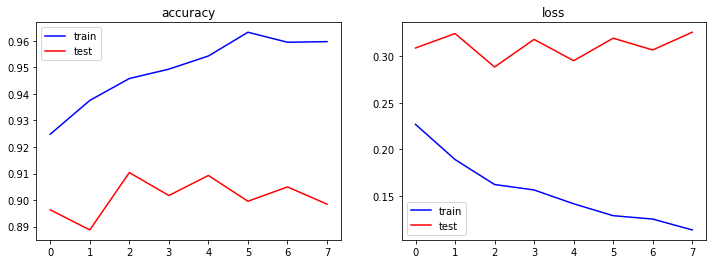

In [27]:
accuracy = hist.history['accuracy']         # 그래프 그리기
val_accuracy = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

pl.figure(figsize = (12,4))

pl.subplot(1, 2, 1)
pl.plot(accuracy, 'b-', label="train")
pl.plot(val_accuracy, 'r-', label="test")
pl.legend()
pl.title('accuracy')

pl.subplot(1, 2, 2)
pl.plot(loss, 'b-', label="train")
pl.plot(val_loss, 'r-', label="test")
pl.legend()
pl.title('loss')

pl.show()

29/29 [==============================] - 6s 213ms/step


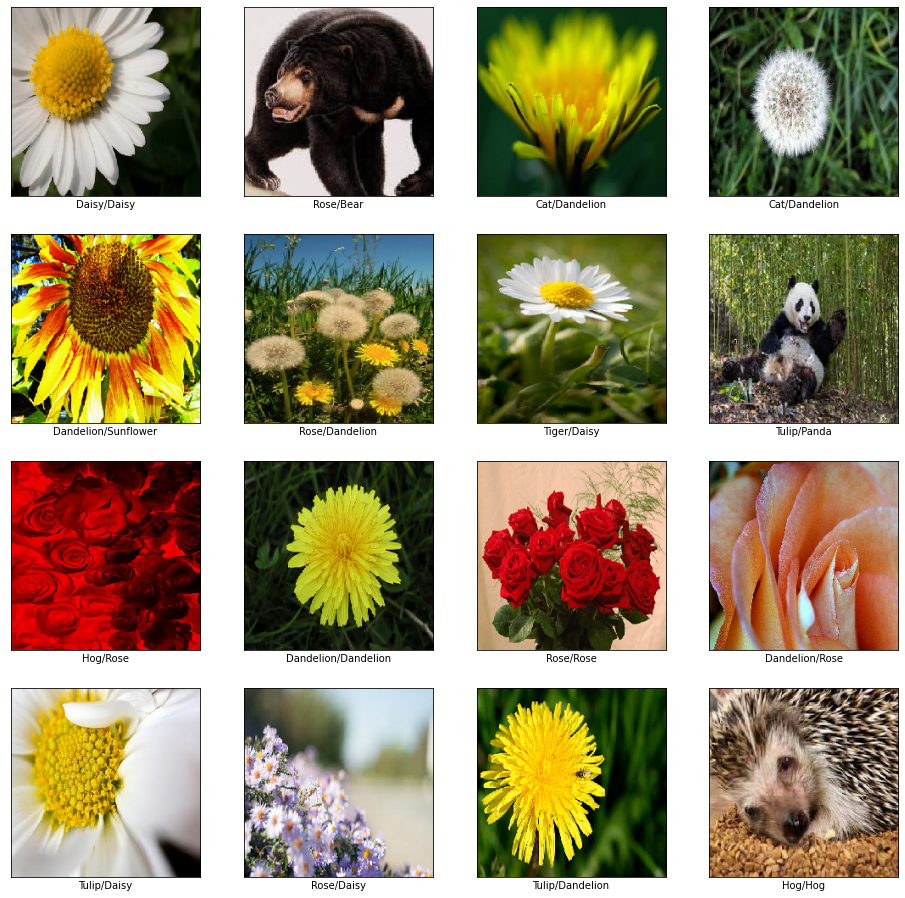

In [39]:
cn = ['Bear', 'Cat', 'Dog', 'Hog', 'Panda', 'Tiger', 'Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

val, lbl_batch = next(iter(valid))
pred = md.predict(valid)
pred = np.argmax(pred, axis = 1)

pl.figure(figsize = (16, 16))

for i in range(16):

  pl.subplot(4, 4, i+1)
  pl.imshow(val[i])
  pl.xticks(ticks = [])
  pl.yticks(ticks = [])

  an = cn[pred[i]]
  y = cn[np.argmax(lbl_batch[i])]

  lbl = an + "/" + y

  pl.xlabel(lbl)

pl.show()

In [38]:
cn

['Bear',
 'Cat',
 'Daisy',
 'Dandelion',
 'Dog',
 'Hog',
 'Panda',
 'Rose',
 'Sunflower',
 'Tiger',
 'Tulip']